## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

## Loading Dataset from Kaggle

In [2]:
import json
with open('../artifacts/kaggle.json') as file:
    data = json.load(file)

In [3]:
data

{'username': 'nisharajayakody', 'key': '27d77022d3368c63edb81c325d1ffd53'}

In [4]:
import os
os.environ['KAGGLE_USERNAME'] = data['username']
os.environ['KAGGLE_KEY'] = data['key']

In [5]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [ ]:
api.dataset_download_files('vipoooool/new-plant-diseases-dataset', path='../artifacts/')

In [ ]:
import zipfile

zip_path = '../artifacts/new-plant-diseases-dataset.zip'  # path to the zip file
extract_to = '../artifacts/'  # folder to extract files

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extraction complete!")


## Data Preprocessing

### Training Image Preprocessing

In [6]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '../artifacts/plant-disease-dataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True, #reduce biasness
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


### Validation Image Processing

In [7]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '../artifacts/plant-disease-dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True, #reduce biasness
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [8]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [9]:
#32 traing examples and 32 labels

for x,y in training_set:
    print(x, x.shape)
    print(y, y.shape)
    break

tf.Tensor(
[[[[173.75 155.75 153.75]
   [177.25 159.25 157.25]
   [175.5  157.5  155.5 ]
   ...
   [193.75 173.75 172.75]
   [173.   153.   152.  ]
   [179.   159.   158.  ]]

  [[177.   159.   157.  ]
   [175.5  157.5  155.5 ]
   [172.75 154.75 152.75]
   ...
   [178.   158.   157.  ]
   [170.   150.   149.  ]
   [167.75 147.75 146.75]]

  [[177.75 159.75 157.75]
   [178.5  160.5  158.5 ]
   [171.75 153.75 151.75]
   ...
   [169.75 149.75 148.75]
   [177.25 157.25 156.25]
   [175.5  155.5  154.5 ]]

  ...

  [[156.25 137.25 139.25]
   [156.   137.   139.  ]
   [155.75 136.75 138.75]
   ...
   [142.5  123.5  125.5 ]
   [142.   123.   125.  ]
   [147.   128.   130.  ]]

  [[156.75 137.75 139.75]
   [154.75 135.75 137.75]
   [151.75 132.75 134.75]
   ...
   [130.75 111.75 113.75]
   [145.   126.   128.  ]
   [153.75 134.75 136.75]]

  [[155.25 136.25 138.25]
   [154.5  135.5  137.5 ]
   [153.5  134.5  136.5 ]
   ...
   [127.25 108.25 110.25]
   [146.75 127.75 129.75]
   [166.25 147.25 14

## Building Model

In [10]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [11]:
model = Sequential()

### Building Convolution Layer

In [12]:
 #32 different feature mappings
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

E:\leaf-care\tf-env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [16]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [17]:
model.add(Dropout(0.25)) #to avoid overfitting

In [18]:
model.add(Flatten())

In [19]:
model.add(Dropout(0.4))

In [20]:
model.add(Dense(units=1500,activation='relu'))

In [21]:
#output layer
#activation softmax - will give the probability for each class in each neuron (38 classes)
model.add(Dense(units=38,activation='softmax')) 

### Compiling Model

In [22]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [24]:
training_history = model.fit(x=training_set, validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3318s 1s/step - accuracy: 0.5844 - loss: 1.4175 - val_accuracy: 0.8492 - val_loss: 0.4835
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2580s 1s/step - accuracy: 0.8561 - loss: 0.4523 - val_accuracy: 0.9129 - val_loss: 0.2716
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2866s 1s/step - accuracy: 0.9077 - loss: 0.2820 - val_accuracy: 0.9139 - val_loss: 0.2589
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2849s 1s/step - accuracy: 0.9353 - loss: 0.2003 - val_accuracy: 0.9431 - val_loss: 0.1791
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3474s 2s/step - accuracy: 0.9498 - loss: 0.1528 - val_accuracy: 0.9261 - val_loss: 0.2394
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2499s 1s/step - accuracy: 0.9599 - loss: 0.1215 - val_accuracy: 0.9608 - val_loss: 0.1250
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2544s 1s/step - accuracy: 0.9668 - loss: 0.0999 - val_accuracy: 0.9576 - val_loss: 0.1433
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2898s 1s/step - accuracy: 0.9725 -

## Model Evaluation

In [25]:
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 782s 356ms/step - accuracy: 0.9900 - loss: 0.0317


In [26]:
print(train_loss,train_acc)

0.031661905348300934 0.990041971206665


In [27]:
#Model on validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 210s 382ms/step - accuracy: 0.9665 - loss: 0.1120


In [28]:
print(val_loss,val_acc)

0.11199605464935303 0.9664807915687561


### Saving Model

In [29]:
model.save("../model/trained_model.keras")

In [30]:
training_history.history

{'accuracy': [0.5844085812568665,
  0.8560921549797058,
  0.9076890349388123,
  0.9352585673332214,
  0.9498257637023926,
  0.9599260091781616,
  0.9667543768882751,
  0.9725158214569092,
  0.9767977595329285,
  0.9781208038330078],
 'loss': [1.4175103902816772,
  0.4523179531097412,
  0.28201964497566223,
  0.20029936730861664,
  0.1528107076883316,
  0.1214689165353775,
  0.09985668957233429,
  0.08347722887992859,
  0.06900175660848618,
  0.0660010278224945],
 'val_accuracy': [0.8492488265037537,
  0.9129296541213989,
  0.9138970971107483,
  0.9431481957435608,
  0.9260755777359009,
  0.9608467817306519,
  0.9576029777526855,
  0.9656840562820435,
  0.9595947861671448,
  0.9664807915687561],
 'val_loss': [0.48345428705215454,
  0.27164435386657715,
  0.2588857412338257,
  0.17909158766269684,
  0.23944801092147827,
  0.12498056143522263,
  0.14328773319721222,
  0.11470890790224075,
  0.14188578724861145,
  0.11199609935283661]}

In [31]:
#Recording the history in json
import json
with open("training_hist.json", "w") as f:
    json.dump(training_history.history, f)

### Accuracy Visualization

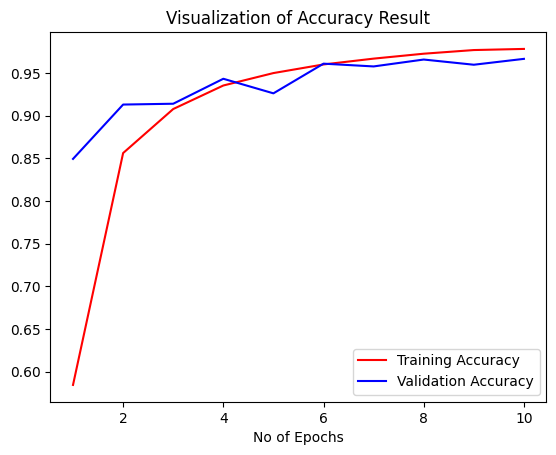

In [32]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No of Epochs")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [33]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [34]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '../artifacts/plant-disease-dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [35]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 189s 343ms/step


(array([[1.0000000e+00, 3.3307474e-13, 9.0919500e-16, ..., 1.3893597e-21,
         1.0310922e-19, 1.8687848e-18],
        [1.0000000e+00, 2.1891362e-10, 3.6333326e-14, ..., 3.1349563e-17,
         2.2843724e-16, 1.9209161e-14],
        [1.0000000e+00, 3.6894550e-12, 7.8639852e-16, ..., 9.5605469e-22,
         2.1064442e-18, 1.8461623e-16],
        ...,
        [4.7591623e-08, 2.6696771e-13, 3.4456379e-10, ..., 1.3021638e-10,
         2.1682954e-11, 9.9999046e-01],
        [2.8426998e-08, 6.5700169e-13, 8.4913554e-10, ..., 1.4264571e-09,
         1.4705723e-10, 9.9999654e-01],
        [9.3675339e-14, 1.4900554e-19, 8.4034843e-16, ..., 3.1148675e-19,
         4.9806636e-17, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [38]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [39]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [41]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [42]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.86      0.99      0.92       504
                                 Apple___Black_rot       0.99      0.98      0.99       497
                          Apple___Cedar_apple_rust       0.98      0.93      0.96       440
                                   Apple___healthy       0.96      0.96      0.96       502
                               Blueberry___healthy       0.93      0.99      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.97      0.98       421
                 Cherry_(including_sour)___healthy       1.00      0.98      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.98      0.81      0.89       410
                       Corn_(maize)___Common_rust_       0.98      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.89      0.99      0.

In [48]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[500,   0,   0, ...,   0,   0,   0],
       [  4, 488,   0, ...,   0,   0,   0],
       [  9,   0, 411, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ..., 486,   0,   0],
       [  0,   0,   0, ...,   0, 447,   0],
       [  0,   0,   0, ...,   0,   0, 475]], dtype=int64)

### Confusion Matrix Visualization

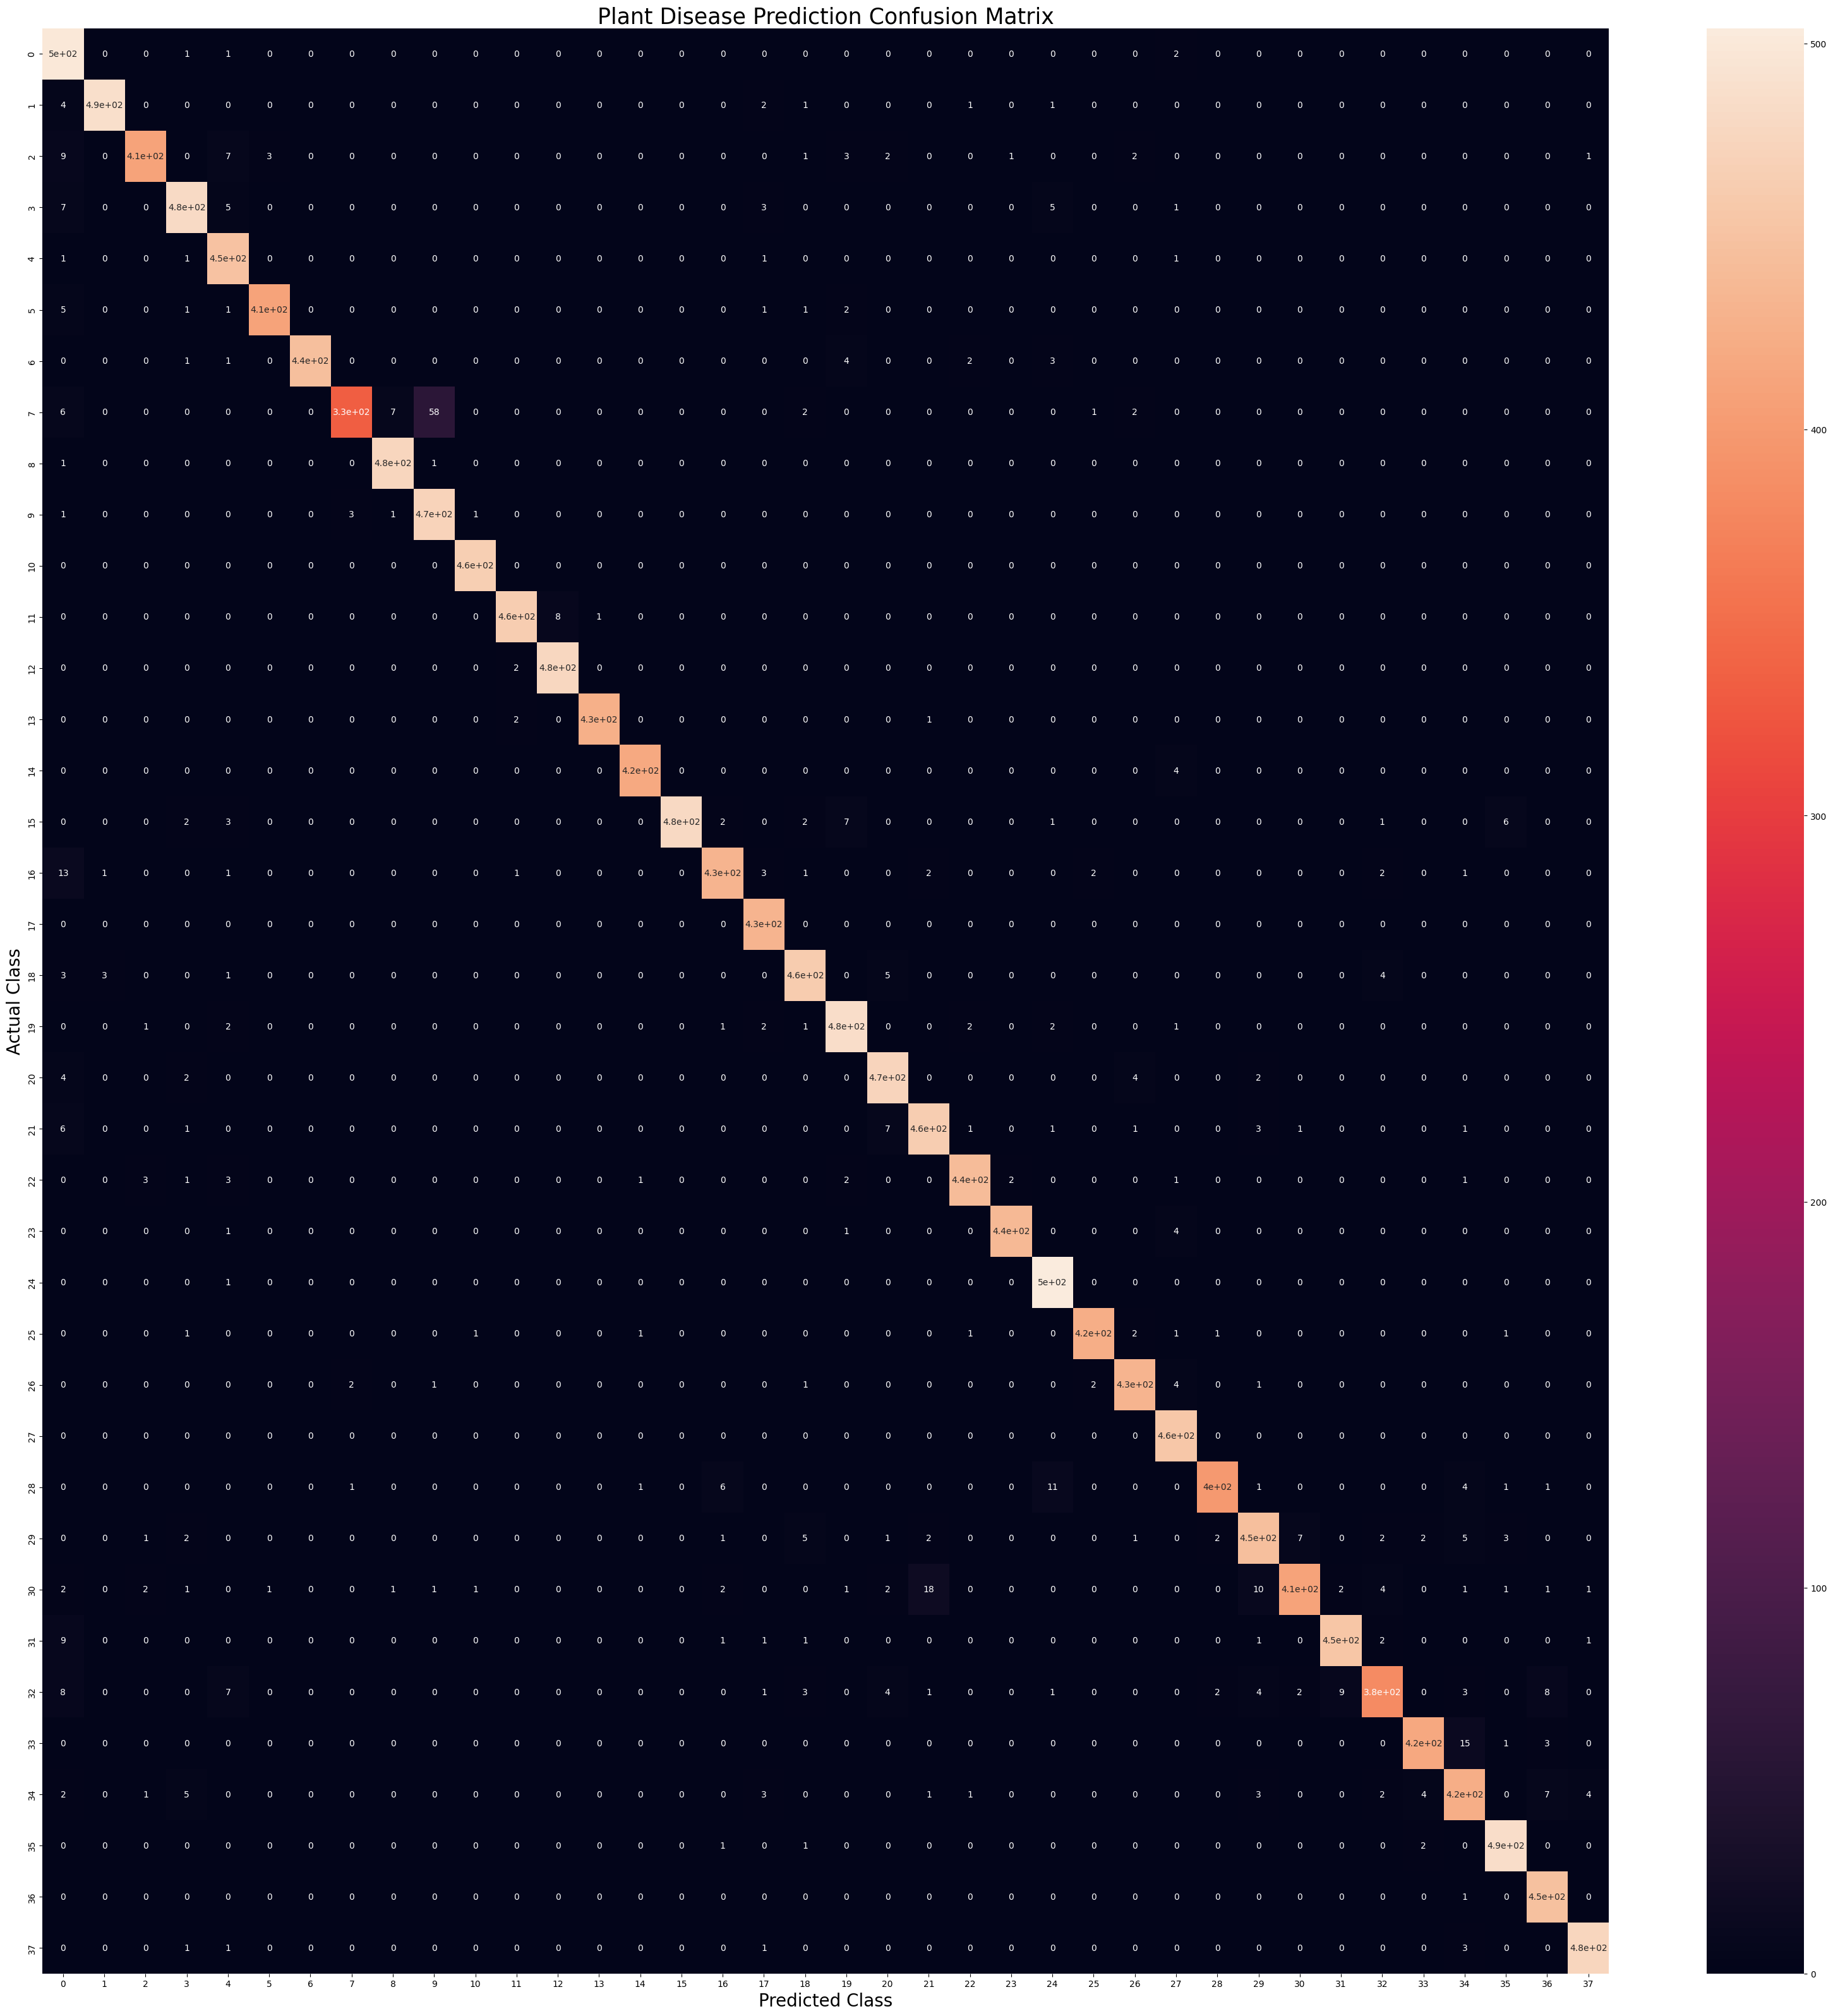

In [52]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()